In [223]:
import pandas as pd

df = pd.read_csv("../data/public/raw-data-kaggle.csv", sep=";")


print(df.head())


    athlete gender         timestamp  distance (m)  elapsed time (s)  \
0  18042525      M  15/12/2019 09:08        2965.8               812   
1  18042525      M  10/12/2019 19:27       10020.8              3290   
2  18042525      M  03/12/2019 19:46       12132.2              4027   
3  18042525      M  26/11/2019 19:46       11631.5              4442   
4  18042525      M  19/11/2019 19:45       11708.1              4022   

   elevation gain (m)  average heart rate (bpm)  
0                17.4                     150.3  
1                52.2                     160.8  
2               249.0                     148.9  
3               194.0                     136.2  
4               250.7                     146.0  


In [224]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42116 entries, 0 to 42115
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   athlete                   42116 non-null  int64  
 1   gender                    41761 non-null  object 
 2   timestamp                 42116 non-null  object 
 3   distance (m)              42116 non-null  float64
 4   elapsed time (s)          42116 non-null  int64  
 5   elevation gain (m)        42116 non-null  float64
 6   average heart rate (bpm)  23732 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ MB
None


In [225]:
print(df.describe())

            athlete   distance (m)  elapsed time (s)  elevation gain (m)  \
count  4.211600e+04   42116.000000      4.211600e+04        42116.000000   
mean   1.503877e+07   11028.352189      4.245974e+03          242.222516   
std    8.652464e+06    7480.264547      1.583939e+04          451.664624   
min    7.715140e+05       0.000000      0.000000e+00            0.000000   
25%    6.583234e+06    7189.600000      2.489750e+03           31.800000   
50%    1.388186e+07   10136.750000      3.442000e+03           86.000000   
75%    2.065396e+07   13236.300000      4.593250e+03          240.800000   
max    4.681758e+07  218950.000000      2.971531e+06        12078.500000   

       average heart rate (bpm)  
count              23732.000000  
mean                 147.652225  
std                   17.291873  
min                    0.000000  
25%                  138.600000  
50%                  148.400000  
75%                  158.100000  
max                  237.000000  


In [226]:
df.isna().sum()

athlete                         0
gender                        355
timestamp                       0
distance (m)                    0
elapsed time (s)                0
elevation gain (m)              0
average heart rate (bpm)    18384
dtype: int64

In [227]:
df.dtypes

athlete                       int64
gender                       object
timestamp                    object
distance (m)                float64
elapsed time (s)              int64
elevation gain (m)          float64
average heart rate (bpm)    float64
dtype: object

Add columns with km, and meters, rename avg_hr, cleaning outliers

Usunięto 904 rekordów z nienaturalnym dystansem
Usunięto 188 rekordów z nienaturalnym czasem
Usunięto 2987 rekordów z nienaturalnym tempem
Usunięto 137 rekordów z nienaturalnym przewyższeniem
Usunięto 46 rekordów z nienaturalnym tętnem


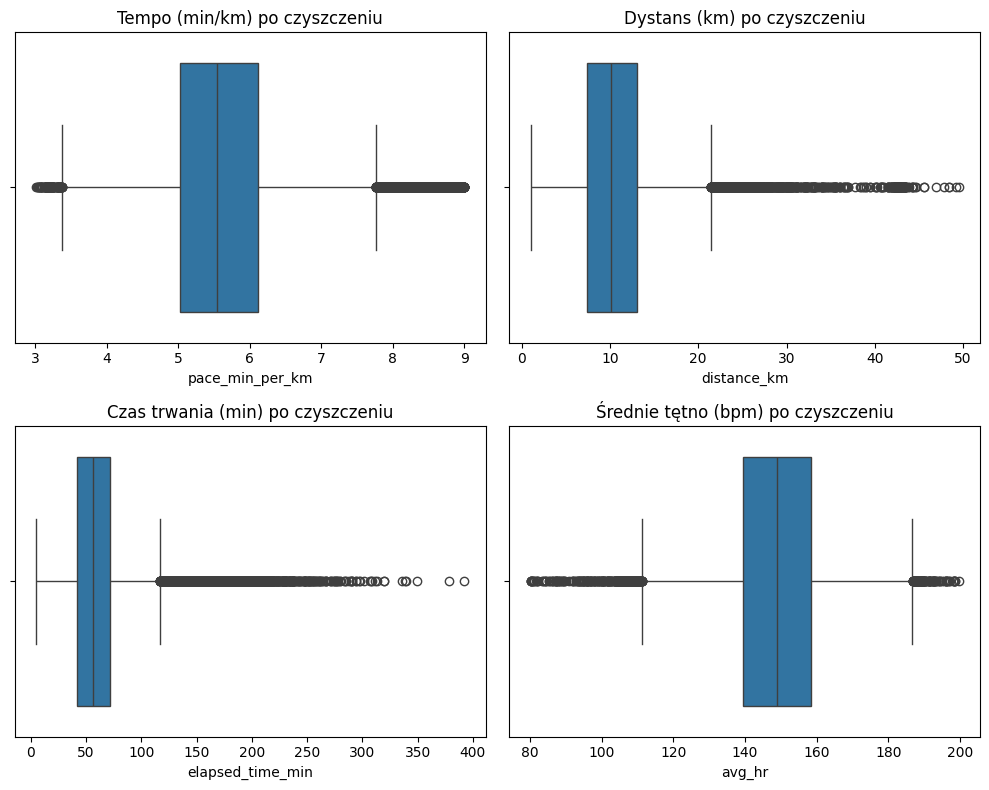


 Gotowe! Po czyszczeniu pozostało 37854 rekordów.


<Axes: xlabel='pace_min_per_km'>

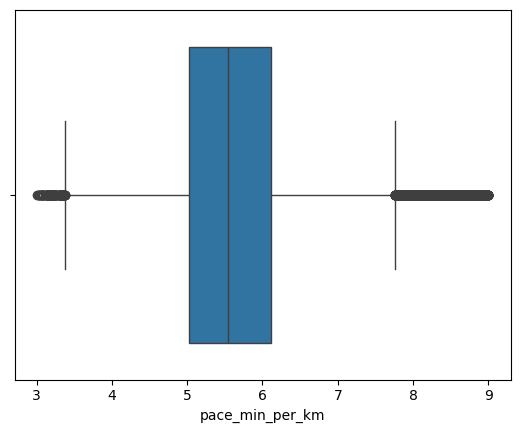

In [228]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df["distance_km"] = df["distance (m)"] /1000 
df["elapsed_time_min"] = df["elapsed time (s)"] /60
df.rename(columns={"average heart rate (bpm)": "avg_hr"}, inplace=True)


df["pace_min_per_km"] = df["elapsed_time_min"] / df["distance_km"]

# Wyczyszczenie wartości nienaturalnych lub błędnych

# Usunięcie aktywności z dystansem < 1 km

# Dystans (km) - ekstremalnie długie aktywności 
before = len(df)
df = df[df["distance_km"].between(1, 50)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym dystansem")

# Czas trwania (minuty) - aktywności z błędnym czasem
before = len(df)
df = df[df["elapsed_time_min"].between(5, 400)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym czasem")

# Tempo (min/km) - zbyt szybkie lub wolne tempa
before = len(df)
df = df[df["pace_min_per_km"].between(3, 9)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym tempem")



# Przewyższenie (m) - nierealne wzrosty wysokości
before = len(df)
df = df[df["elevation gain (m)"].between(0, 2000)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym przewyższeniem")

# Średnie tętno (bpm) - poza zakresem
before = len(df)
df = df[(df["avg_hr"].isna()) | df["avg_hr"].between(80, 200)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym tętnem")

# Reset indeksów 
df.reset_index(drop=True, inplace=True)

#  Wizualizacja po czyszczeniu
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(ax=axes[0,0], x=df["pace_min_per_km"])
axes[0,0].set_title("Tempo (min/km) po czyszczeniu")

sns.boxplot(ax=axes[0,1], x=df["distance_km"])
axes[0,1].set_title("Dystans (km) po czyszczeniu")

sns.boxplot(ax=axes[1,0], x=df["elapsed_time_min"])
axes[1,0].set_title("Czas trwania (min) po czyszczeniu")

sns.boxplot(ax=axes[1,1], x=df["avg_hr"])
axes[1,1].set_title("Średnie tętno (bpm) po czyszczeniu")

plt.tight_layout()
plt.show()

print(f"\n Gotowe! Po czyszczeniu pozostało {len(df)} rekordów.")


sns.boxplot(x=df['pace_min_per_km'])


Encoding gender

In [241]:
df["has_hr"] = df["avg_hr"].notna().astype(int)
df["gender_encoded"] = df["gender"].map({"M": 1, "F": 2}).fillna(0)
df["has_gender"] = np.where(df["gender_encoded"] == 0, 0, 1)

df["source"] = 0

df["speed_kmh"] = df["distance_km"] / (df["elapsed_time_min"] / 60 )

In [242]:
df.head()

,athlete,gender,timestamp,distance (m),elapsed time (s),elevation gain (m),avg_hr,distance_km,elapsed_time_min,pace_min_per_km,has_hr,gender_encoded,has_gender,source,speed_kmh
0,18042525,M,15/12/2019 09:08,2965.8,812,17.4,150.3,2.9658,13.533333,4.563131,1,1.0,1,0,13.148867
1,18042525,M,10/12/2019 19:27,10020.8,3290,52.2,160.8,10.0208,54.833333,5.471952,1,1.0,1,0,10.965009
2,18042525,M,03/12/2019 19:46,12132.2,4027,249.0,148.9,12.1322,67.116667,5.532110,1,1.0,1,0,10.845771
3,18042525,M,26/11/2019 19:46,11631.5,4442,194.0,136.2,11.6315,74.033333,6.364900,1,1.0,1,0,9.426700
4,18042525,M,19/11/2019 19:45,11708.1,4022,250.7,146.0,11.7081,67.033333,5.725381,1,1.0,1,0,10.479652


In [231]:
df.columns

Index(['athlete', 'gender', 'timestamp', 'distance (m)', 'elapsed time (s)',
       'elevation gain (m)', 'avg_hr', 'distance_km', 'elapsed_time_min',
       'pace_min_per_km', 'has_hr', 'gender_encoded', 'has_gender', 'source'],
      dtype='object')

In [232]:
df.isna().sum()

athlete                   0
gender                  332
timestamp                 0
distance (m)              0
elapsed time (s)          0
elevation gain (m)        0
avg_hr                16118
distance_km               0
elapsed_time_min          0
pace_min_per_km           0
has_hr                    0
gender_encoded            0
has_gender                0
source                    0
dtype: int64

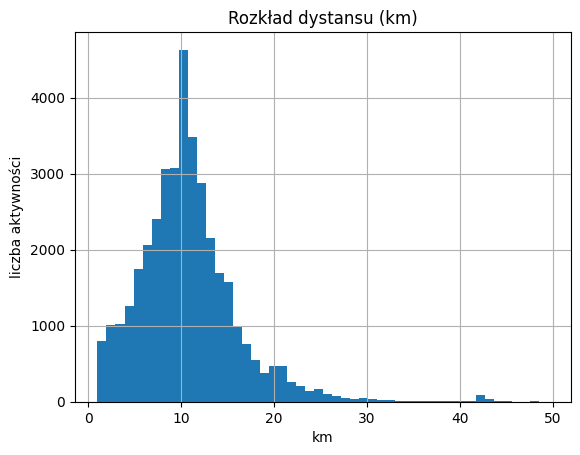

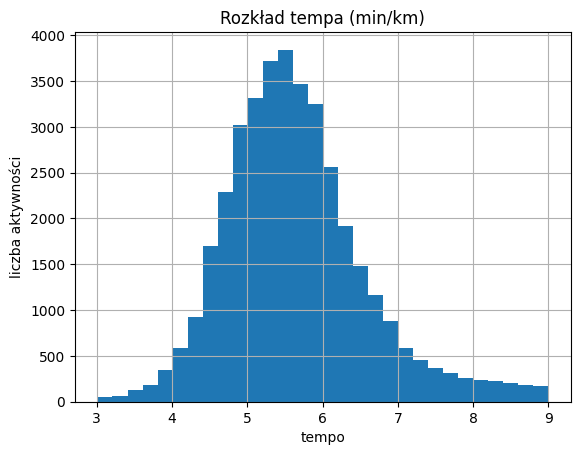

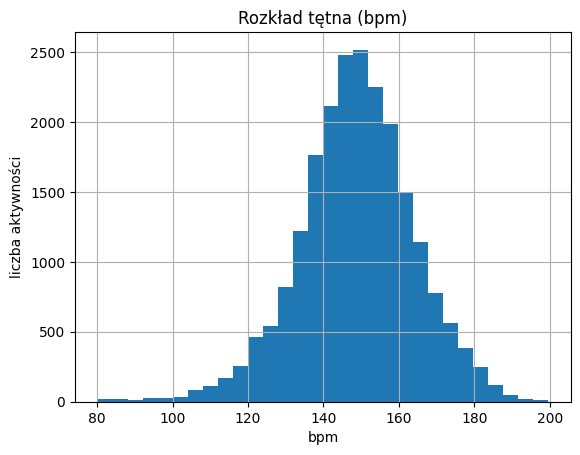

In [233]:
import matplotlib.pyplot as plt

df['distance_km'].hist(bins=50)
plt.title('Rozkład dystansu (km)')
plt.xlabel('km')
plt.ylabel('liczba aktywności')
plt.show()

df['pace_min_per_km'].hist(bins=30)
plt.title('Rozkład tempa (min/km)')
plt.xlabel('tempo')
plt.ylabel('liczba aktywności')
plt.show()

df["avg_hr"].hist(bins=30)
plt.title('Rozkład tętna (bpm)')
plt.xlabel('bpm')
plt.ylabel('liczba aktywności')
plt.show()

<Axes: >

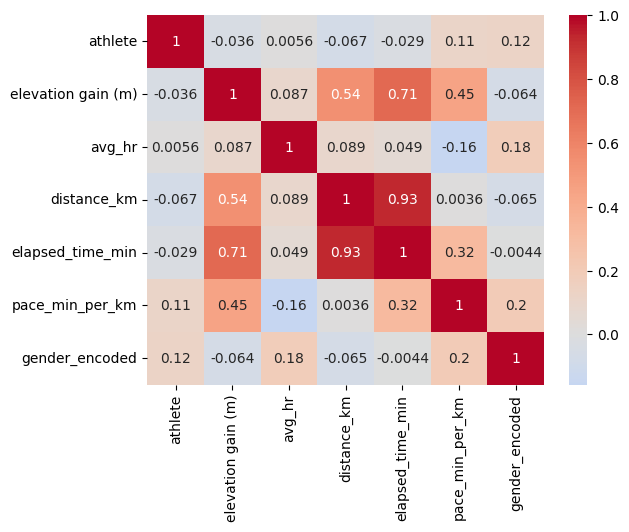

In [234]:
new_df = df[['athlete','elevation gain (m)', 'avg_hr', 'distance_km', 'elapsed_time_min',
       'pace_min_per_km','gender_encoded']]
sns.heatmap(new_df.corr(method="pearson"), annot=True, cmap="coolwarm", center=0)

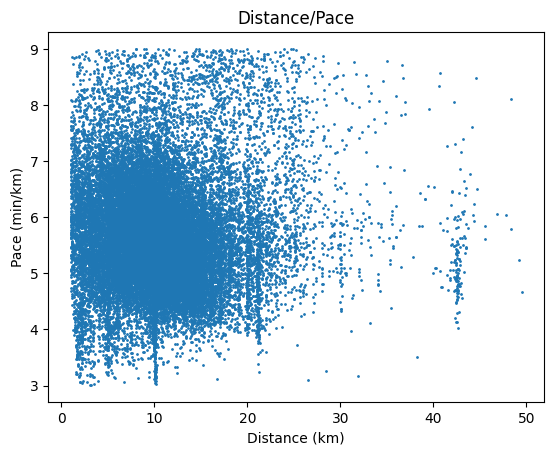

In [235]:
plt.scatter(df["distance_km"], df["pace_min_per_km"], s=1)
plt.title("Distance/Pace")
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.show()


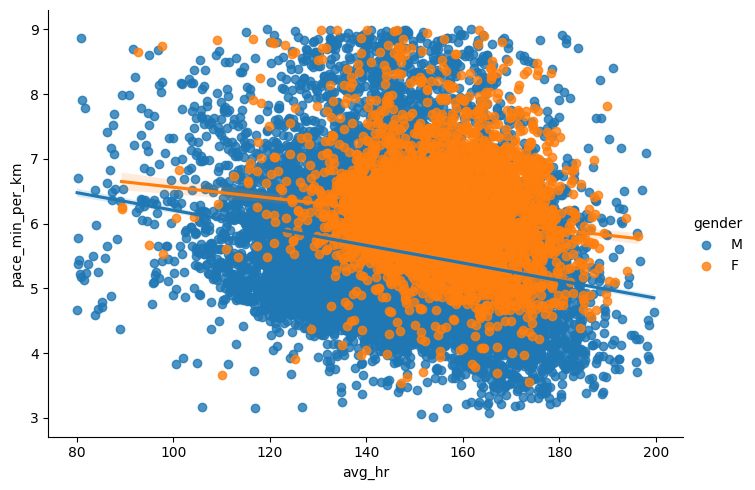

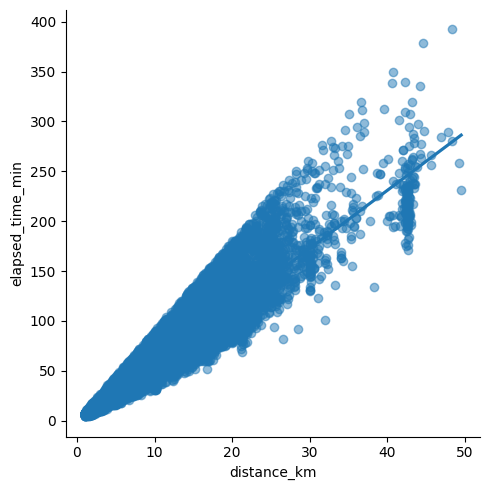

In [236]:
sns.lmplot(data=df, x='avg_hr', y='pace_min_per_km', hue='gender', aspect=1.4)
sns.lmplot(data=df, x='distance_km', y='elapsed_time_min', scatter_kws={'alpha':0.5})


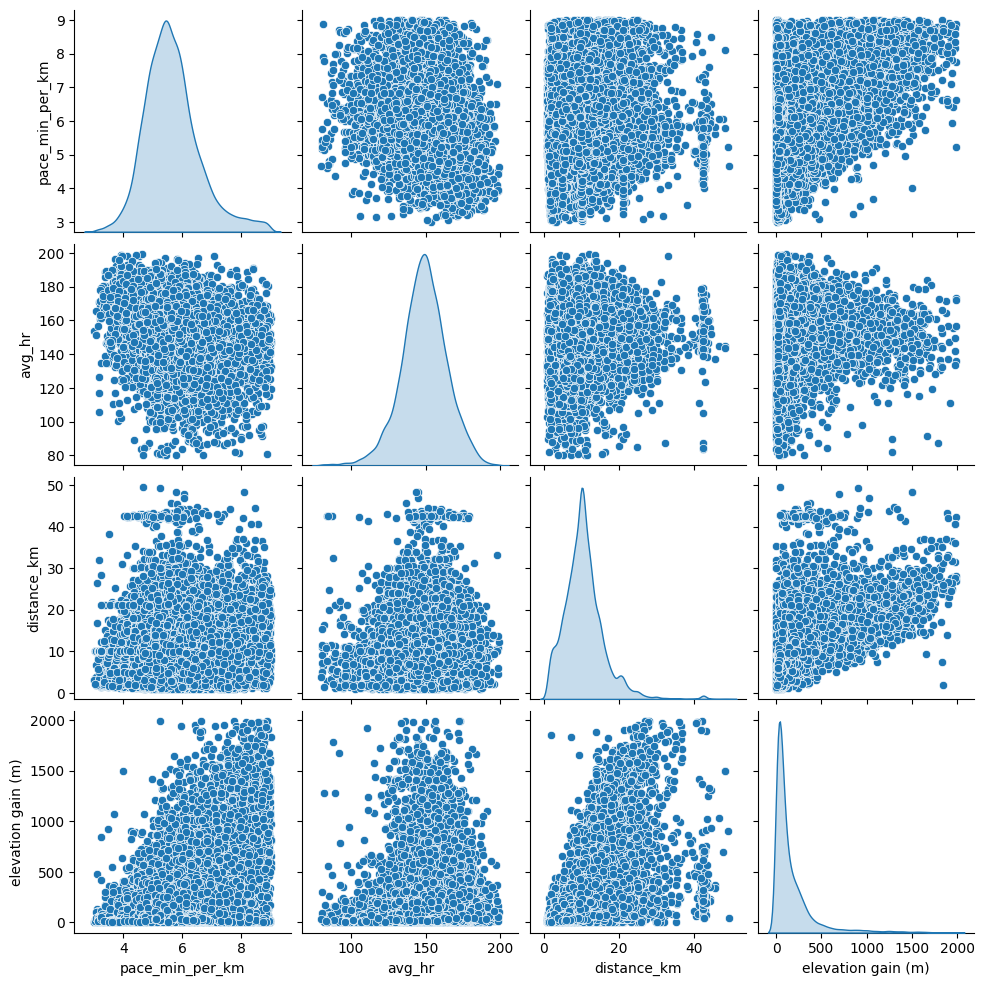

In [237]:
sns.pairplot(df[['pace_min_per_km', 'avg_hr', 'distance_km', 'elevation gain (m)']], diag_kind='kde')
